In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Distance Estimation Redone

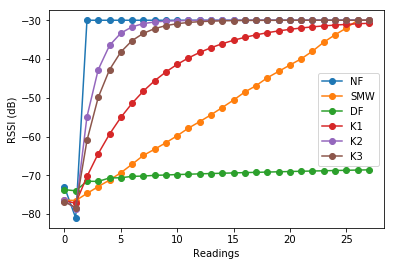

In [97]:
df = pd.read_table("distance/conv3",sep=',')
NF = df['NF'].copy()
SMW = df['SMW'].copy()
DF = df['DF'].copy()
K1 = df['K1'].copy()
K2 = df['K2'].copy()
K3 = df['K3'].copy()
plt.plot(NF, marker='o')
plt.plot(SMW, marker='o')
plt.plot(DF, marker='o')
plt.plot(K1, marker='o')
plt.plot(K2, marker='o')
plt.plot(K3, marker='o')
plt.xlabel('Readings')
plt.ylabel('RSSI (dB)')
plt.legend()

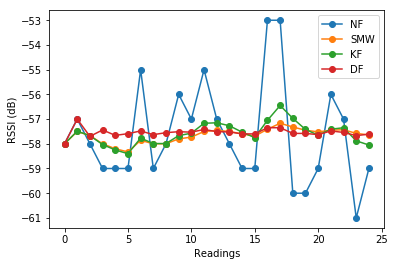

In [98]:
df = pd.read_table("distance/grafico_rssi_1m",sep=',')
NF = df['NF'].copy()
SMW = df['SMW'].copy()
KF = df['KF'].copy()
DF = df['DF'].copy()
plt.plot(NF,marker='o')
plt.plot(SMW,marker='o')
plt.plot(KF,marker='o')
plt.plot(DF,marker='o')
plt.xlabel('Readings')
plt.ylabel('RSSI (dB)')
plt.legend()

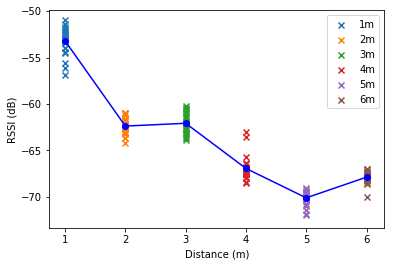

In [99]:
df = pd.read_table("distance/6m_compare",sep=',')
df2 = pd.read_table('distance/linha_media',header=None)
df2.index += 1
M1 = df['1m'].copy()
M2 = df['2m'].copy()
M3 = df['3m'].copy()
M4 = df['4m'].copy()
M5 = df['5m'].copy()
M6 = df['6m'].copy()
y = np.asarray([1]*25)
plt.scatter(x=y,y=M1,marker='x')
y+=1
plt.scatter(x=y,y=M2,marker='x')
y+=1
plt.scatter(x=y,y=M3,marker='x')
y+=1
plt.scatter(x=y,y=M4,marker='x')
y+=1
plt.scatter(x=y,y=M5,marker='x')
y+=1
plt.scatter(x=y,y=M6,marker='x')
plt.plot(df2,marker='o',color='blue')
plt.xlabel('Distance (m)')
plt.ylabel('RSSI (dB)')
plt.legend()

# All scenarios

In [100]:
import json
def load_movement(filename):
    with open(filename) as f:
        x = json.load(f)
    return x

In [101]:
path = []
path.append(load_movement("../../../datasets/scenario1.data"))
path.append(load_movement("../../../datasets/scenario2.data"))
path.append(load_movement("../../../datasets/scenario3.data"))
path.append(load_movement("../../../datasets/scenario4.data"))
path.append(load_movement("../../../datasets/scenario5.data"))
len(path)

5

In [102]:
xxs = []
yys = []
for p in path:
    xs = []
    ys = []
    for x,y in p:
        xs.append((x*9.3)/1280)
        ys.append((y*6.82)/720)
    xxs.append(xs)
    yys.append(ys)
print(len(xxs), len(yys))

5 5


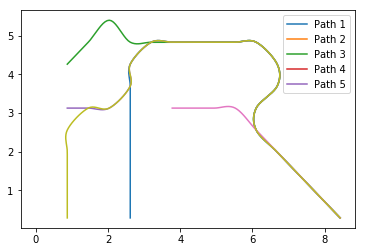

In [103]:
plt.plot(xxs[0],yys[0], 1)
plt.plot(xxs[1],yys[1], 1)
plt.plot(xxs[2],yys[2], 1)
plt.plot(xxs[3],yys[3], 1)
plt.plot(xxs[4],yys[4], 1)
plt.legend(['Path 1','Path 2', 'Path 3', 'Path 4', 'Path 5'])

# Scenario 1

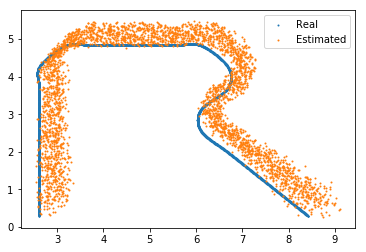

In [104]:
df = pd.read_csv("./trila_scenario1.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()
positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
plt.scatter(positions[' x_real'], positions[' y_real'], 1)
plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

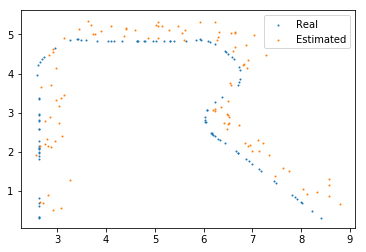

In [105]:
samples = positions.sample(100)
plt.scatter(samples[' x_real'], samples[' y_real'], 1)
plt.scatter(samples[' e_x_real'], samples[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [106]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.431695
std         0.163640
min         0.009409
25%         0.315421
50%         0.430697
75%         0.545199
max         1.012907
Name:  error_real, dtype: float64

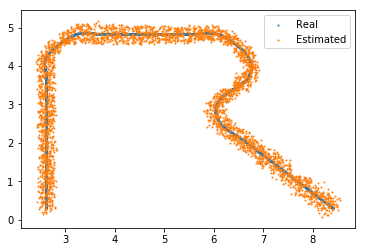

In [107]:
df = pd.read_csv("./pf_multinomial_scenario1.csv")

dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

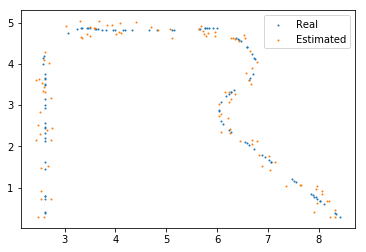

In [108]:
samples = positions.sample(100)
plt.scatter(samples[' x_real'], samples[' y_real'], 1)
plt.scatter(samples[' e_x_real'], samples[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [109]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.141906
std         0.063541
min         0.001569
25%         0.096318
50%         0.140339
75%         0.182864
max         0.419805
Name:  error_real, dtype: float64

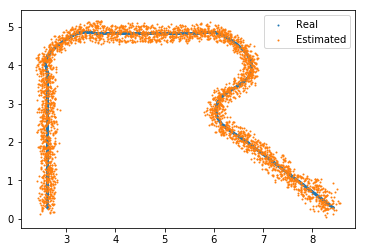

In [110]:
df = pd.read_csv("./epf_multinomial_scenario1.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [111]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.146414
std         0.067709
min         0.000864
25%         0.096068
50%         0.144844
75%         0.188902
max         0.539880
Name:  error_real, dtype: float64

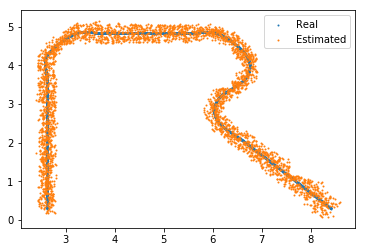

In [112]:
df = pd.read_csv("./pf_systematic_scenario1.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [113]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.141266
std         0.063420
min         0.000717
25%         0.096913
50%         0.139198
75%         0.183449
max         0.416061
Name:  error_real, dtype: float64

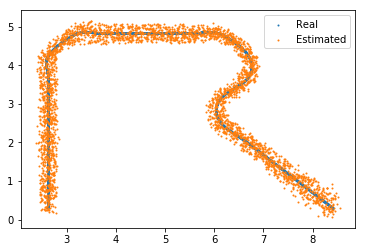

In [114]:
df = pd.read_csv("./epf_systematic_scenario1.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [115]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.144823
std         0.066180
min         0.004506
25%         0.097617
50%         0.142364
75%         0.186988
max         0.508842
Name:  error_real, dtype: float64

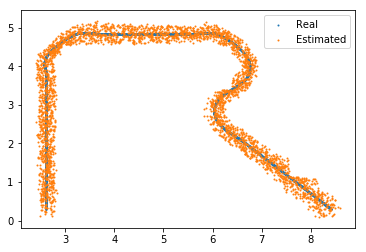

In [116]:
df = pd.read_csv("./pf_stratified_scenario1.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [117]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.143425
std         0.065413
min         0.003333
25%         0.094194
50%         0.141539
75%         0.186154
max         0.436052
Name:  error_real, dtype: float64

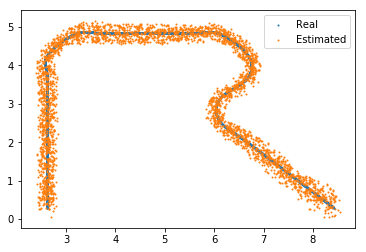

In [118]:
df = pd.read_csv("./epf_stratified_scenario1.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [119]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.142694
std         0.067969
min         0.002493
25%         0.092780
50%         0.141257
75%         0.186699
max         0.433500
Name:  error_real, dtype: float64

# Scenario 2

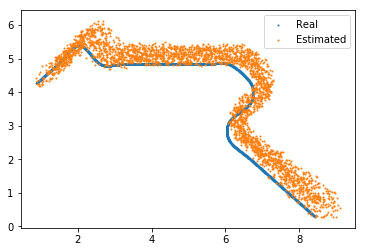

In [120]:
df = pd.read_csv("./trila_scenario2.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()
positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
plt.scatter(positions[' x_real'], positions[' y_real'], 1)
plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [121]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.436517
std         0.173826
min         0.012141
25%         0.314028
50%         0.430412
75%         0.554669
max         1.073231
Name:  error_real, dtype: float64

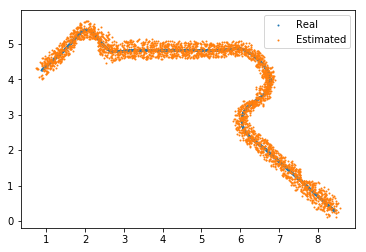

In [122]:
df = pd.read_csv("./pf_multinomial_scenario2.csv")

dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [123]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.143929
std         0.064708
min         0.003021
25%         0.096194
50%         0.143608
75%         0.187596
max         0.384544
Name:  error_real, dtype: float64

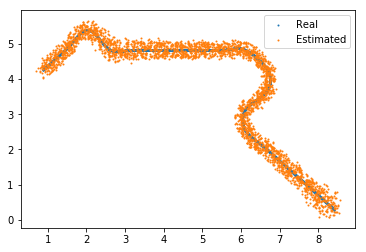

In [124]:
df = pd.read_csv("./epf_multinomial_scenario2.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [125]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.151723
std         0.070401
min         0.001578
25%         0.101654
50%         0.149735
75%         0.194867
max         0.480612
Name:  error_real, dtype: float64

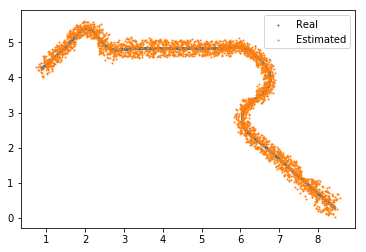

In [126]:
df = pd.read_csv("./pf_systematic_scenario2.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [127]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.144913
std         0.065360
min         0.001874
25%         0.098738
50%         0.141872
75%         0.186011
max         0.420219
Name:  error_real, dtype: float64

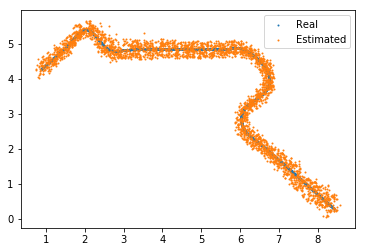

In [128]:
df = pd.read_csv("./epf_systematic_scenario2.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [129]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.148690
std         0.069090
min         0.006338
25%         0.097769
50%         0.145332
75%         0.192441
max         0.544755
Name:  error_real, dtype: float64

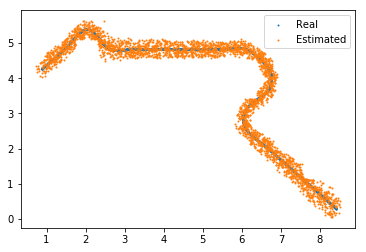

In [130]:
df = pd.read_csv("./pf_stratified_scenario2.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [131]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.145189
std         0.066906
min         0.004191
25%         0.095745
50%         0.143242
75%         0.189395
max         0.426310
Name:  error_real, dtype: float64

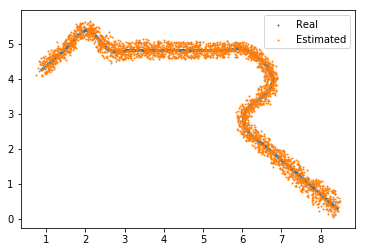

In [132]:
df = pd.read_csv("./epf_stratified_scenario2.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [133]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.148291
std         0.068569
min         0.003171
25%         0.098403
50%         0.144384
75%         0.192023
max         0.417164
Name:  error_real, dtype: float64

# Scenario 3

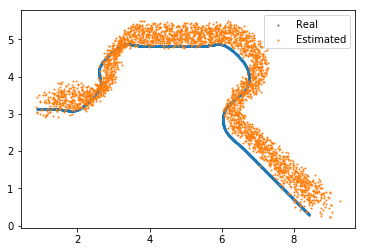

In [134]:
df = pd.read_csv("./trila_scenario3.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()
positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
plt.scatter(positions[' x_real'], positions[' y_real'], 1)
plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [135]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.433107
std         0.169011
min         0.013899
25%         0.310590
50%         0.429920
75%         0.553944
max         0.970250
Name:  error_real, dtype: float64

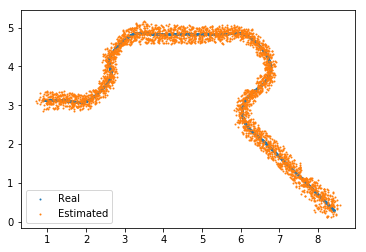

In [136]:
df = pd.read_csv("./pf_multinomial_scenario3.csv")

dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [137]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.141154
std         0.062320
min         0.008066
25%         0.094963
50%         0.139829
75%         0.182972
max         0.431012
Name:  error_real, dtype: float64

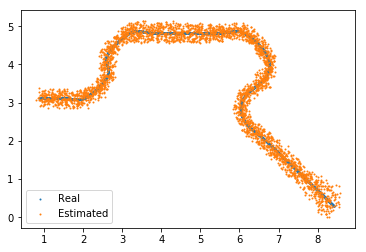

In [138]:
df = pd.read_csv("./epf_multinomial_scenario3.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [139]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.146780
std         0.069697
min         0.000293
25%         0.097563
50%         0.141015
75%         0.192499
max         0.522876
Name:  error_real, dtype: float64

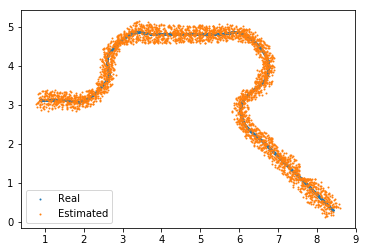

In [140]:
df = pd.read_csv("./pf_systematic_scenario3.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [141]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.144122
std         0.063859
min         0.004098
25%         0.096655
50%         0.142211
75%         0.185795
max         0.406003
Name:  error_real, dtype: float64

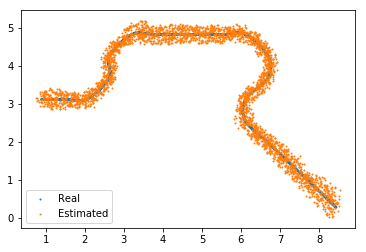

In [142]:
df = pd.read_csv("./epf_systematic_scenario3.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [143]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.146503
std         0.068134
min         0.001088
25%         0.096042
50%         0.143059
75%         0.189357
max         0.457886
Name:  error_real, dtype: float64

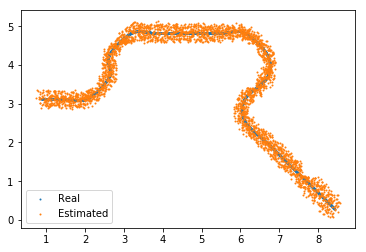

In [144]:
df = pd.read_csv("./pf_stratified_scenario3.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [145]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.142925
std         0.063192
min         0.002497
25%         0.097181
50%         0.142450
75%         0.183907
max         0.369770
Name:  error_real, dtype: float64

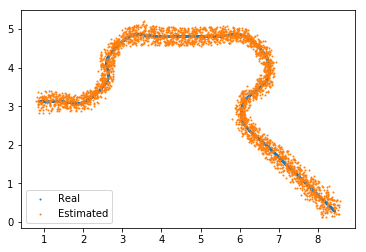

In [146]:
df = pd.read_csv("./epf_stratified_scenario3.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [147]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.147430
std         0.067626
min         0.003713
25%         0.098283
50%         0.144411
75%         0.190957
max         0.474839
Name:  error_real, dtype: float64

# Scenario 4 results

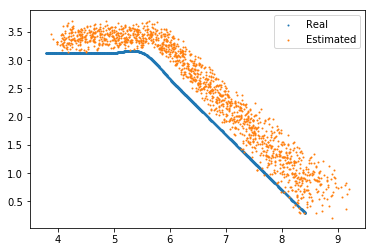

In [148]:
df = pd.read_csv("./trila_scenario4.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()
positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
plt.scatter(positions[' x_real'], positions[' y_real'], 1)
plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [149]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.434170
std         0.143639
min         0.028654
25%         0.330140
50%         0.428878
75%         0.524892
max         0.919381
Name:  error_real, dtype: float64

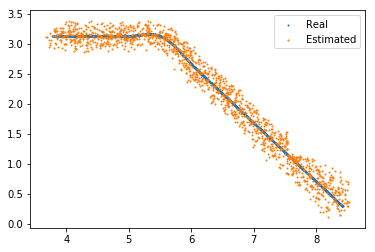

In [150]:
df = pd.read_csv("./pf_multinomial_scenario4.csv")

dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [151]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.139387
std         0.064412
min         0.004784
25%         0.092356
50%         0.138098
75%         0.180503
max         0.424526
Name:  error_real, dtype: float64

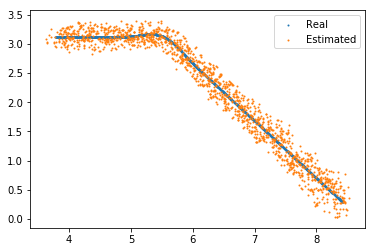

In [152]:
df = pd.read_csv("./epf_multinomial_scenario4.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [153]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.143841
std         0.066175
min         0.001586
25%         0.094794
50%         0.141505
75%         0.187793
max         0.443781
Name:  error_real, dtype: float64

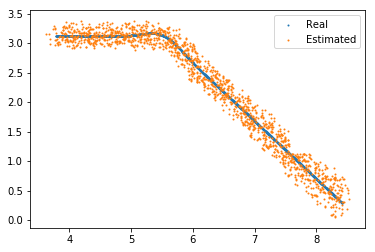

In [154]:
df = pd.read_csv("./pf_systematic_scenario4.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [155]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.139526
std         0.062608
min         0.002137
25%         0.095520
50%         0.138683
75%         0.179466
max         0.394504
Name:  error_real, dtype: float64

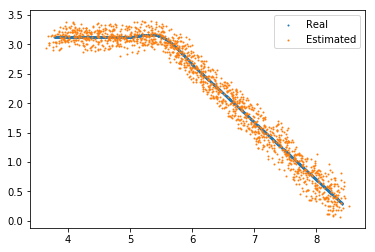

In [156]:
df = pd.read_csv("./epf_systematic_scenario4.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [157]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.143884
std         0.067334
min         0.000234
25%         0.093952
50%         0.142312
75%         0.185796
max         0.419387
Name:  error_real, dtype: float64

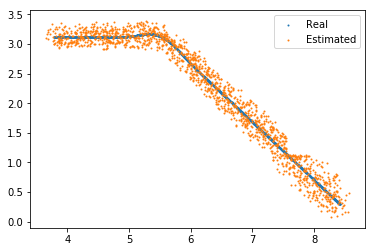

In [158]:
df = pd.read_csv("./pf_stratified_scenario4.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [159]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.138170
std         0.062591
min         0.005865
25%         0.093289
50%         0.135099
75%         0.177391
max         0.434230
Name:  error_real, dtype: float64

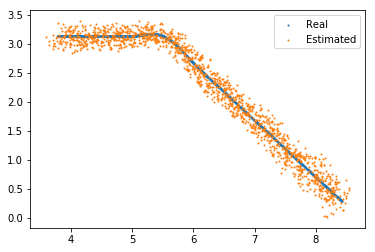

In [160]:
df = pd.read_csv("./epf_stratified_scenario4.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [161]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.138870
std         0.064725
min         0.002703
25%         0.092836
50%         0.135376
75%         0.179016
max         0.401037
Name:  error_real, dtype: float64

# Scenario 5 results

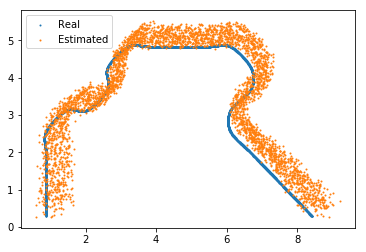

In [162]:
df = pd.read_csv("./trila_scenario5.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()
positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
plt.scatter(positions[' x_real'], positions[' y_real'], 1)
plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [163]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.436193
std         0.183619
min         0.005099
25%         0.302286
50%         0.433512
75%         0.560078
max         1.104313
Name:  error_real, dtype: float64

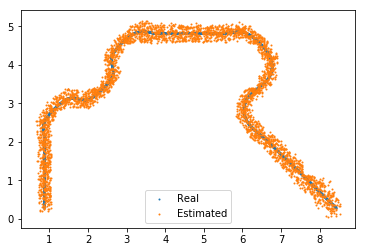

In [164]:
df = pd.read_csv("./pf_multinomial_scenario5.csv")

dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [165]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.142506
std         0.063198
min         0.001306
25%         0.097727
50%         0.142173
75%         0.184719
max         0.448033
Name:  error_real, dtype: float64

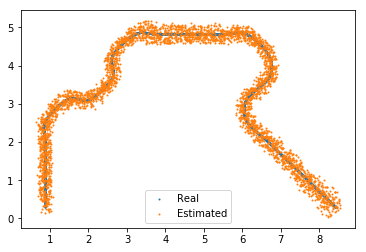

In [166]:
df = pd.read_csv("./epf_multinomial_scenario5.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [167]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.147207
std         0.067034
min         0.004330
25%         0.097652
50%         0.144258
75%         0.189621
max         0.415264
Name:  error_real, dtype: float64

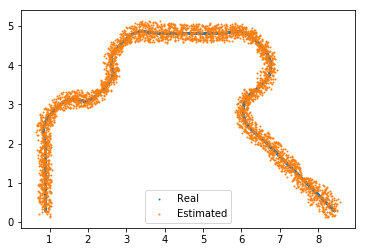

In [168]:
df = pd.read_csv("./pf_systematic_scenario5.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [169]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.144751
std         0.064785
min         0.001667
25%         0.096928
50%         0.143708
75%         0.187641
max         0.361099
Name:  error_real, dtype: float64

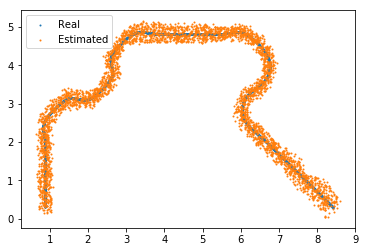

In [170]:
df = pd.read_csv("./epf_systematic_scenario5.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [171]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.146281
std         0.068592
min         0.001983
25%         0.096358
50%         0.144020
75%         0.190247
max         0.442640
Name:  error_real, dtype: float64

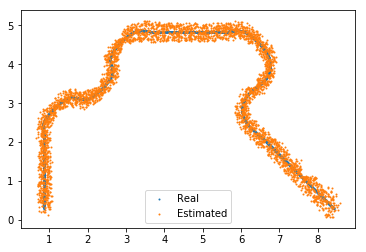

In [172]:
df = pd.read_csv("./pf_stratified_scenario5.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [173]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.144171
std         0.062822
min         0.004800
25%         0.099257
50%         0.143561
75%         0.185873
max         0.418261
Name:  error_real, dtype: float64

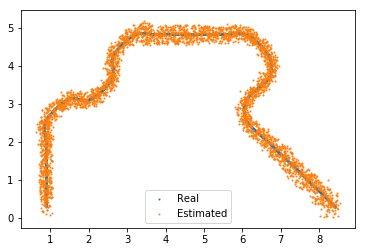

In [174]:
df = pd.read_csv("./epf_stratified_scenario5.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()

plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'])

In [175]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.146228
std         0.068543
min         0.002111
25%         0.095365
50%         0.143198
75%         0.190960
max         0.485382
Name:  error_real, dtype: float64